# **MOVIE RECOMENDATION**

#**Import Library**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Proyek ini bertujuan untuk mengembangkan Sistem Rekomendasi Film yang canggih dan personal. Sistem ini akan menggunakan metode yaitu content-based filtering untuk memberikan rekomendasi film yang sesuai dengan preferensi masing-masing pengguna. Fokus utama adalah memberikan pengalaman rekomendasi yang lebih akurat dan personal, sehingga meningkatkan kepuasan dan keterlibatan pengguna dalam mengeksplorasi dunia film.

##**Assess Situation**

  1. Pengguna sering kali merasa kesulitan untuk menemukan film yang sesuai dengan selera mereka.
  2. Sistem rekomendasi yang ada belum sepenuhnya memahami preferensi unik setiap pengguna, sehingga seringkali memberikan rekomendasi yang kurang akurat.

##**Data Mining Goals**

  1. Meningkatkan kepuasan pengguna dengan memberikan rekomendasi film yang sesuai dengan preferensi masing-masing.
  2. Meningkatkan keterlibatan pengguna dalam mengeksplorasi konten film di platform.


##**Project Plan**

  1. Mengembangkan Sistem Rekomendasi Film yang mengintegrasikan content-based filtering
  2. Menganalisis karakteristik film yang disukai oleh pengguna melalui content-based filtering untuk memberikan rekomendasi yang lebih akurat dan personal.
  3. Fleksibilitas dalam menyesuaikan preferensi pengguna akan menjadi kunci untuk meningkatkan kepuasan dan keterlibatan pengguna dalam mengeksplorasi dunia film.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Pada tugas data mining ini saya mendapatkan dataset dari website kaggle, berikut ada link dari dataset yang saya gunakan:

In [21]:
DATA_URL = '/content/drive/MyDrive/Dataset/movies_metadata.csv'

##**Describe Data**

####Informasi Dasar

In [22]:
movie = pd.read_csv(DATA_URL)
movie

<ipython-input-22-56db79b46abd>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie = pd.read_csv(DATA_URL)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


Dapat dilihat dari dataset movie diatas terdapat 45.466 baris dan juga 24 kolom yang ditampilkan. Data ini masih mentah dan belum difilter untuk menyesesuaikan dengan kebutuhan.

In [23]:
movie.head().reset_index(drop=True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Menampilkan 5 data pertama

####Informasi Lanjutan

In [24]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

- Kolom adult
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan apakah film tersebut untuk dewasa atau tidak

- Kolom belongs_to_collection
  - Hanya memiliki 4.494 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan apakah film tersebut termasuk dalam sebuah koleksi film

- Kolom budget
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan anggaran produksi film

- Kolom genres
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan genre-genre yang dimiliki oleh film tersebut

- Kolom homepage
  - Hanya memiliki 7.782 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan halaman web resmi film tersebut

- Kolom id
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan ID unik film

- Kolom imdb_id
  - Memiliki 45.449 baris
  - Bertipe data objek
  - Menunjukkan ID IMDb film tersebut

- Kolom original_language
  - Memiliki 45.455 baris
  - Bertipe data objek
  - Menunjukkan bahasa asli film tersebut

- Kolom original_title
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan judul film tersebut

- Kolom overview
  - Hanya memiliki 44.512 baris yang tidak null
  - Bertipe data objek
  - Memberikan ringkasan singkat/sinopsi dari film

- Kolom popularity
  - Memiliki 45.461 baris
  - Bertipe data objek
  - Menunjukkan tingkat popularitas film

- Kolom poster_path
  - Hanya memiliki 45.080 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan lokasi path poster film

- Kolom production_companies
  - Memiliki 45.463 baris
  - Bertipe data objek
  - Menunjukkan perusahaan-perusahaan yang terlibat dalam produksi film

- Kolom production_countries
  - Memiliki 45.463 baris
  - Bertipe data objek
  - Menunjukkan negara-negara yang terlibat dalam produksi film

- Kolom release_date
  - Hanya memiliki 45.379 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan tanggal rilis film

- Kolom revenue
  - Memiliki 45.460 baris
  - Bertipe data float64
  - Menunjukkan pendapatan film

- Kolom runtime
  - Hanya memiliki 45.203 baris yang tidak null
  - Bertipe data float64
  - Menunjukkan durasi film dalam menit

- Kolom spoken_languages
  - Memiliki 45.460 baris
  - Bertipe data objek
  - Menunjukkan bahasa-bahasa yang digunakan dalam film

- Kolom status
  - Hanya memiliki 45.379 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan status produksi film

- Kolom tagline
  - Hanya memiliki 20.412 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan tagline atau slogan film

- Kolom title
  - Hanya memiliki 45.460 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan judul film

- Kolom video
  - Memiliki 45.460 baris
  - Bertipe data objek
  - Menunjukkan apakah film tersebut memiliki video atau tidak

- Kolom vote_average
  - Memiliki 45.460 baris
  - Bertipe data float64
  - Menunjukkan rata-rata rating yang diberikan penonton untuk film

- Kolom vote_count
  - Memiliki 45.460 baris
  - Bertipe data float64
  - Menunjukkan jumlah suara yang diberikan pada film tersebut

####Informasi Statistik Deskriptif

In [25]:
movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


- Revenue
  - Jumlah pendapatan film bervariasi dari 0 hingga 2.79 miliar
  - Rata-rata pendapatan film adalah sekitar $11.2 juta

- Runtime
  - Durasi film berkisar antara 0 hingga 1.256 menit
  - Rata-rata durasi film adalah sekitar 94 menit

- Vote Average
  - Rating film berkisar dari 0 hingga 10
  - Rata-rata rating film sekitar 5.62

- Vote Count
  - Jumlah suara yang diberikan pada film bervariasi dari 0 hingga 14.075
  - Rata-rata jumlah suara yang diberikan pada film adalah sekitar 109.9

##**Exploratory Data Analysis**

In [26]:
def genre_name(genre_list):
  return [genre["name"] for genre in eval(genre_list)]

movie["genre_name"] = movie["genres"].apply(genre_name)

In [27]:
genre_counts = movie["genre_name"].explode().value_counts()
genre_counts

Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions                         1
Vision View E

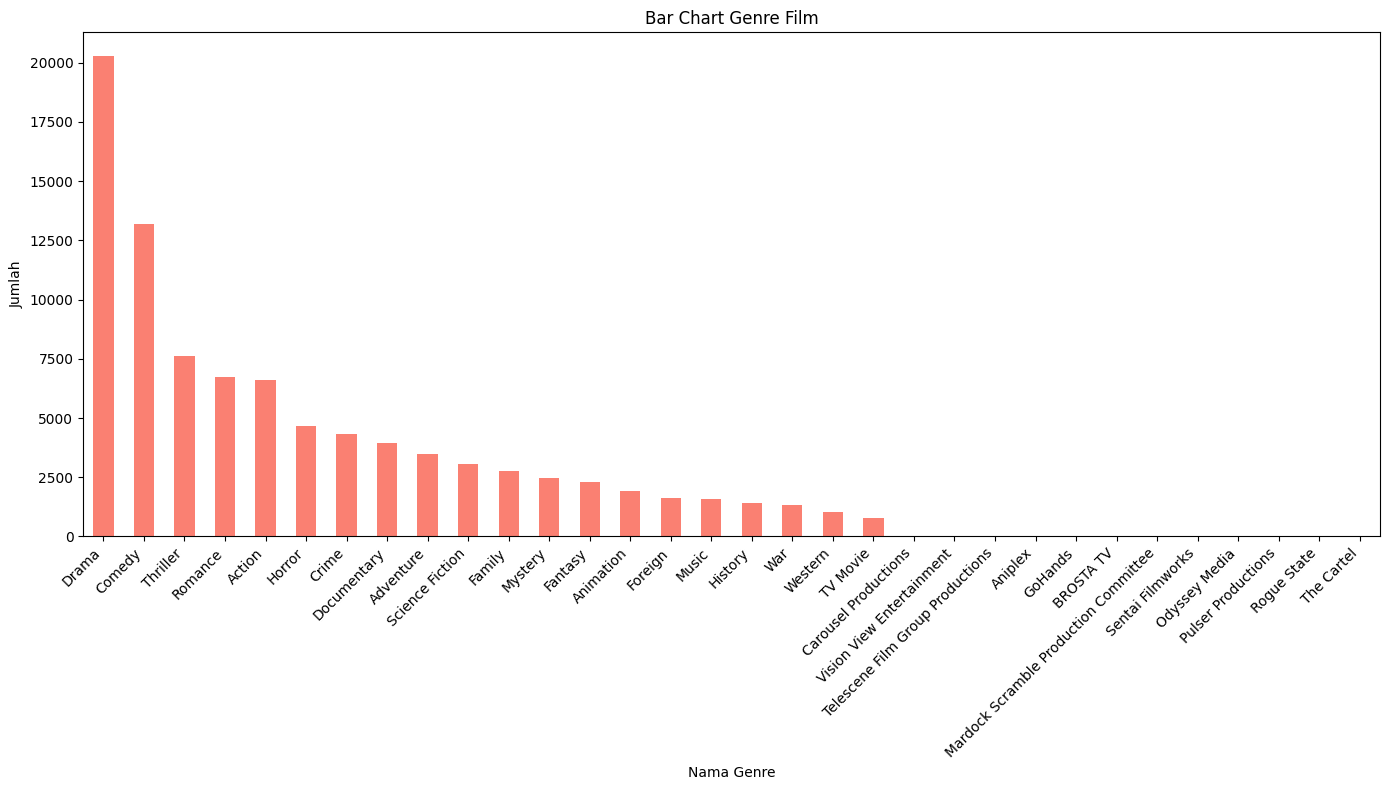

In [28]:
plt.figure(figsize=(14,8))
genre_counts.plot(kind="bar", color="salmon")
plt.title("Bar Chart Genre Film")
plt.xlabel("Nama Genre")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Bisa dilihat pada visualisasi diatas Genre Drama mendominasi jumlah film dalam dataset, menunjukkan popularitas yang tinggi di antara penghasilan film. Selain Drama, genre seperti Comedy, Thriller, Romance, dan Action juga memiliki jumlah yang cukup tinggi, menunjukkan popularitas yang konsisten.

Namun beberapa genre juga memiliki jumlah film yang lebih rendah, seperti Western, TV Movie, dan Foreign. Ini mungkin mencerminkan preferensi yang lebih khusus atau fokus pada pasar tertentu. Dan juga terdapat entitas yang bukan genre film sebenarnya seperti carousel productions dan vision view entertainment, yang mungkin merupakan kesalahan atau perlu diidentifikasi dan ditangani secara khusus.



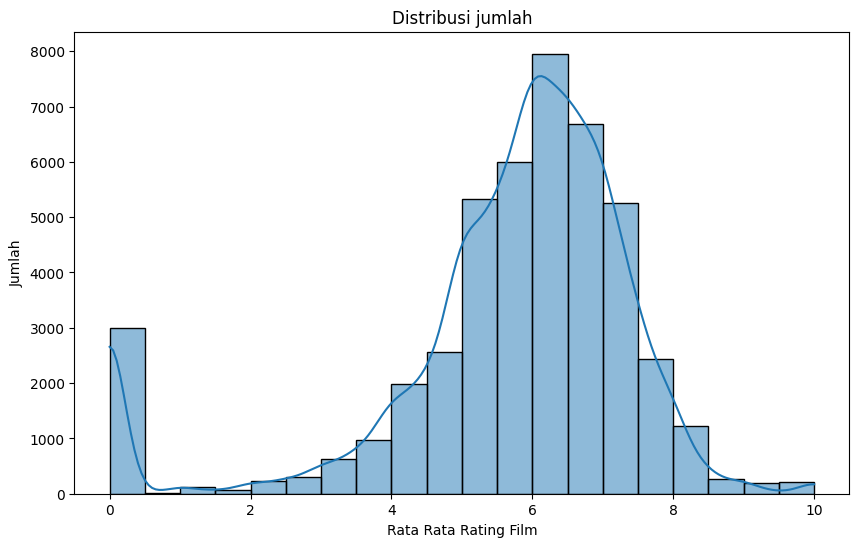

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(movie['vote_average'], bins=20, kde=True)
plt.title('Distribusi jumlah')
plt.xlabel('Rata Rata Rating Film')
plt.ylabel('Jumlah')
plt.show()

Bisa kita lihat pada visualisasi diatas menunjukkan bahwa sebagian besar film memiliki peringkat di sekitar 5 hingga 7.5, dengan puncak distribusi terletak di sekitar nilai 6. Ini menunjukkan bahwa mayoritas film cenderung mendapatkan peringkat yang relatif positif.

##**Verify Data Quality**

####Missing Values

In [30]:
missing_values = movie.isnull().sum()
print(missing_values)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
genre_name                   0
dtype: int64


Penjelasan mengenai nilai kosong dalam dataset movie:

1. adult: Tidak ada nilai kosong, setiap film memiliki klasifikasi apakah untuk dewasa atau tidak

2. belongs_to_collection: Terdapat 40.972 nilai kosong, banyak film yang tidak termasuk dalam koleksi tertentu

3. budget: Tidak ada nilai kosong, setiap film memiliki data anggaran produksi

4. genres: Tidak ada nilai kosong,setiap film mencantumkan genre-genre yang dimilikinya

5. homepage: Terdapat 37.684 nilai kosong, mayoritas film tidak memiliki halaman web resmi

6. id: Tidak ada nilai koong, setiap film memiliki ID unik

7. imdb_id: Hanya 17 nilai kosong, hampir semua film memiliki ID IMDb

8. original_language: Hanya 11 nilai kosong, setiap film memiliki bahasa asli yang diidentifikasi

9. original_title: Tidak ada nilai kosong, setiap film mencantumkan judul asli

10. overview: Terdapat 954 nilai kosong, sekitar 954 film tidak memiliki ringkasan overview

11. popularity: Hanya 5 nilai kosong, popularitas film umumnya tercatat

12. poster_path: Terdapat 386 nilai kosong, poster film tidak tersedia untuk beberapa film

13. production_companies: Hanya 3 nilai kosong, sebagian besar film mencantumkan perusahaan produksi yang terlibat

14. production_countries: Hanya 3 nilai kosong. Hampir semua film menunjukkan negara produksi.

15. release_date: Terdapat 87 nilai kosong, sebagian kecil film tidak memiliki tanggal rilis

16. revenue: Hanya 6 nilai kosong, sebagian kecil film tidak memiliki data pendapatan

17. runtime: Terdapat 263 nilai kosong, beberapa film tidak memiliki informasi durasi

18. spoken_languages: Hanya 6 nilai kosong, hampir setiap film mencantumkan bahasa yang digunakan

19. status: Terdapat 87 nilai kosong, beberapa film tidak memiliki status produksi yang jelas

20. tagline: Terdapat 25.054 nilai kosong, banyak film yang tidak memiliki tagline khusus

21. title: Hanya 6 nilai kosong, sebagian kecil film tidak memiliki judul

22. video: Hanya 6 nilai kosong, mayoritas film tidak memiliki tautan video terkait

23. vote_average: Hanya 6 nilai kosong, hampir setiap film memiliki peringkat rata-rata

24. vote_count: Hanya 6 nilai kosong, hampir setiap film memiliki jumlah suara yang diberikan

####Outliers Values

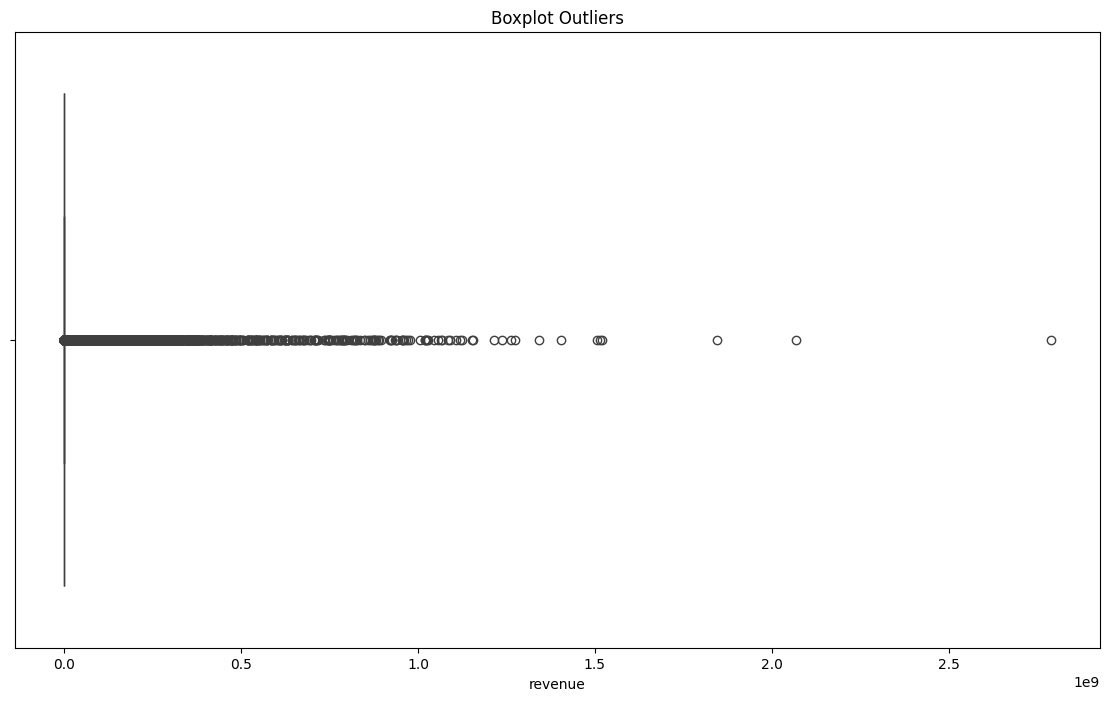

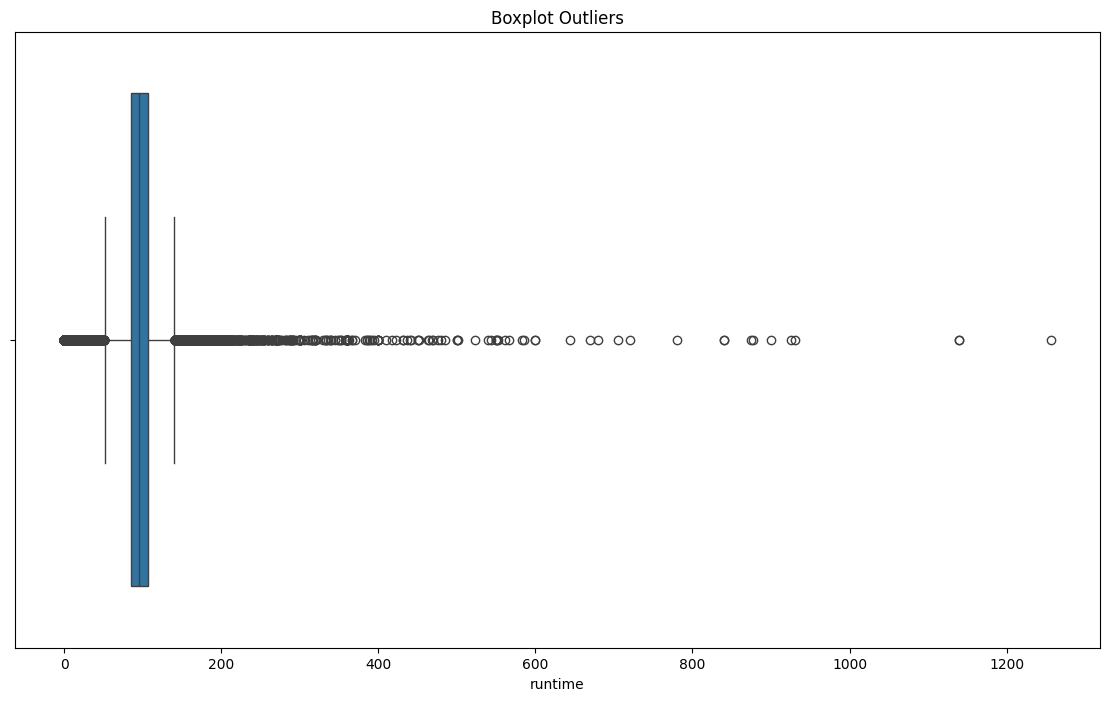

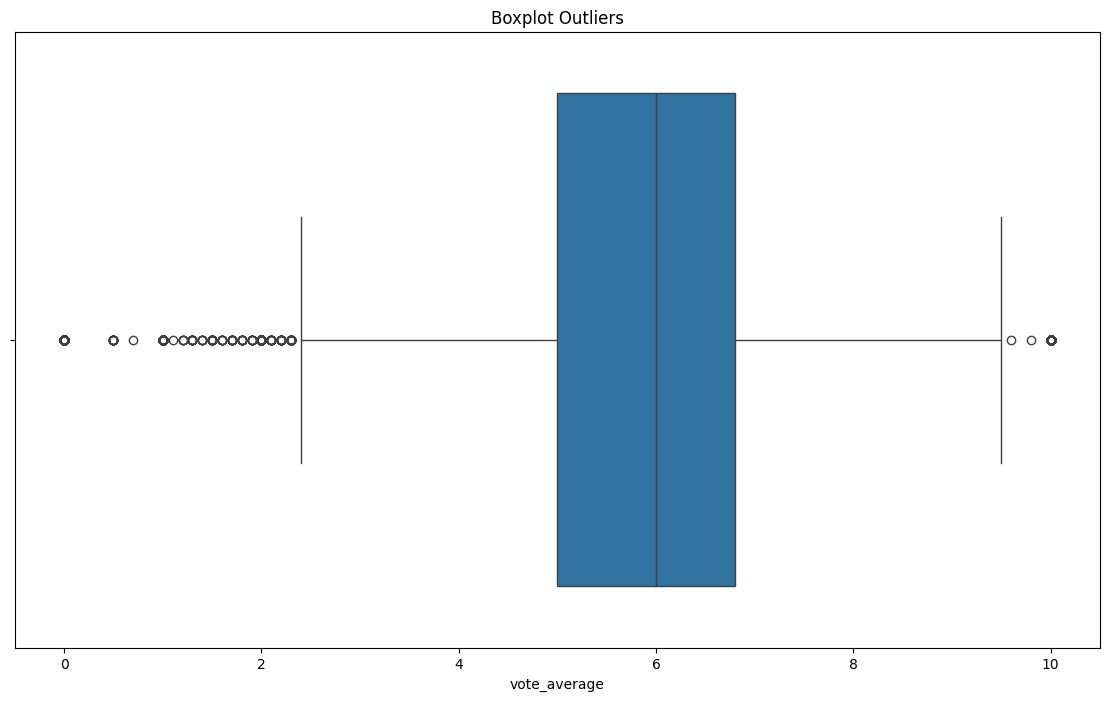

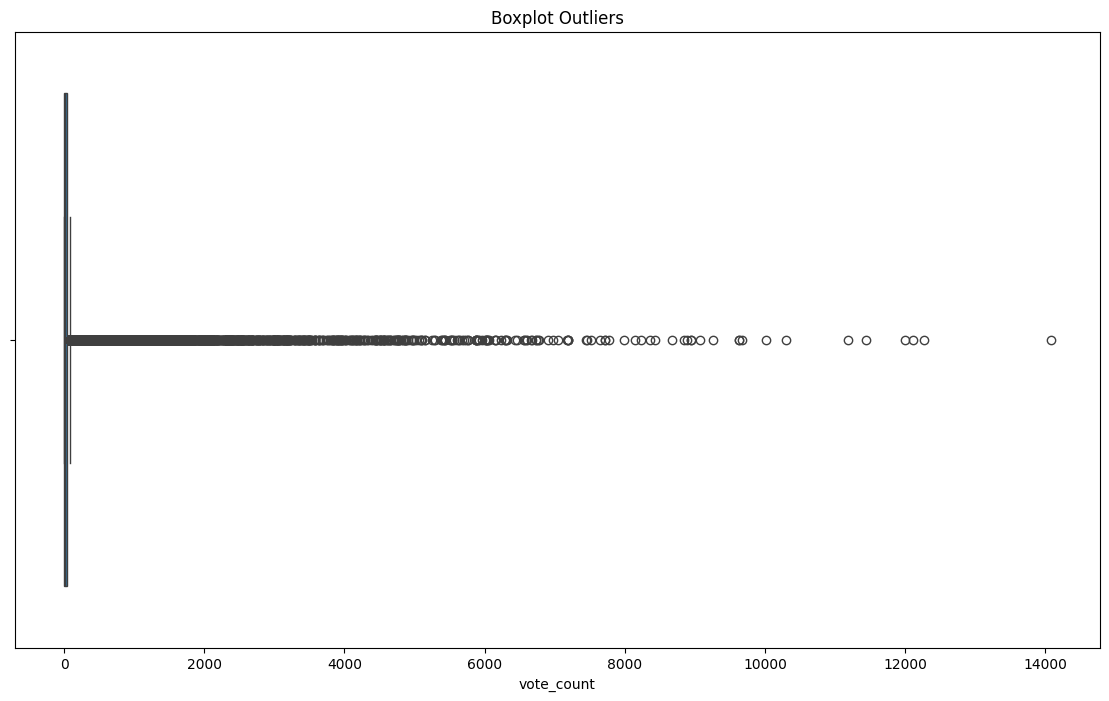

In [31]:
columns = ["revenue", "runtime","vote_average", "vote_count"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=movie[col])
  plt.title("Boxplot Outliers")
  plt.show()

- Boxplot untuk revenue
  
  Titik titik di luar garis batas menunjukkan adanya nilai-nilai yang jauh dari nilai-nilai lainnya. Dalam konteks ini kayanya outliers dapat mengindikasikan film-film dengan pendapatan yang sangat tinggi
- Boxplot untuk runtime

  Titik titik di luar garis batas menunjukkan adanya nilai-nilai yang jauh dari nilai-nilai lainnya. Dalam konteks ini utliers dapat memberikan wawasan tentang film-film dengan durasi yang tidak biasa
- Boxplot untuk vote_average

  Titik titik di luar garis batas menunjukkan adanya outliers dalam nilai vote_average. Dalam konteks ini outliers dapat memberikan wawasan tentang film-film dengan rating yang signifikan secara positif atau negatif
- Boxplot untuk vote_count:

  Titik titik di luar garis batas menunjukkan adanya outliers dalam jumlah vote. Dalam konteks ini outliers dapat menunjukkan film-film yang menerima jumlah vote yang signifikan mungkin karena popularitas atau kontroversi tertentu

####Duplicated Values

In [38]:
duplicate_values = movie["imdb_id"].duplicated().sum()
print(f"Kolom imdb_id memiliki duplikat value sebanyak: {duplicate_values}")

Kolom imdb_id memiliki duplikat value sebanyak: 48


In [34]:
duplicate_values = movie["id"].duplicated().sum()
print(f"Kolom id memiliki duplikat value sebanyak: {duplicate_values}")

Kolom id memiliki duplikat value sebanyak: 30


In [32]:
duplicate_values = movie["original_title"].duplicated().sum()
print(f"Kolom original_title memiliki duplikat value sebanyak: {duplicate_values}")

Kolom original_title memiliki duplikat value sebanyak: 2093


In [39]:
duplicate_values = movie["overview"].duplicated().sum()
print(f"Kolom overview memiliki duplikat value sebanyak: {duplicate_values}")

Kolom overview memiliki duplikat value sebanyak: 1158


In [37]:
duplicate_values = movie["popularity"].duplicated().sum()
print(f"Kolom popularity memiliki duplikat value sebanyak: {duplicate_values}")

Kolom original_title memiliki duplikat value sebanyak: 1289


Dapat kita lihat pada output diatas menampilkan nilai nilai duplikat dari beberapa kolom yang ingin kita pakai untuk analisis kedepannya

####Inconsistent Values / Noise (Optional)

In [35]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)